In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi hasil pohon keputusan
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
# Membaca file CSV
df = pd.read_csv('/content/data_balita.csv')  # atau sesuai path file Anda
df.head()


,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [3]:
# Cek nilai null
print(df.isnull().sum())

# Ubah kolom kategori ke numerik
df['Jenis Kelamin'] = df['Jenis Kelamin'].map({'laki-laki': 0, 'perempuan': 1})

# Encode label status gizi
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Status Gizi'] = le.fit_transform(df['Status Gizi'])

df.head()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64


,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,0,44.591973,2
1,0,0,56.705203,3
2,0,0,46.863358,0
3,0,0,47.508026,0
4,0,0,42.743494,1


In [6]:
# Memisahkan fitur dan label
X = df.drop('Status Gizi', axis=1)
y = df['Status Gizi']

# Bagi data 80% untuk training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Buat dan latih model decision tree
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [8]:
# Prediksi hasil
y_pred = model.predict(X_test)

# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi: 0.9987603305785124

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13382
           1       1.00      1.00      1.00      4130
           2       1.00      1.00      1.00      2790
           3       1.00      1.00      1.00      3898

    accuracy                           1.00     24200
   macro avg       1.00      1.00      1.00     24200
weighted avg       1.00      1.00      1.00     24200



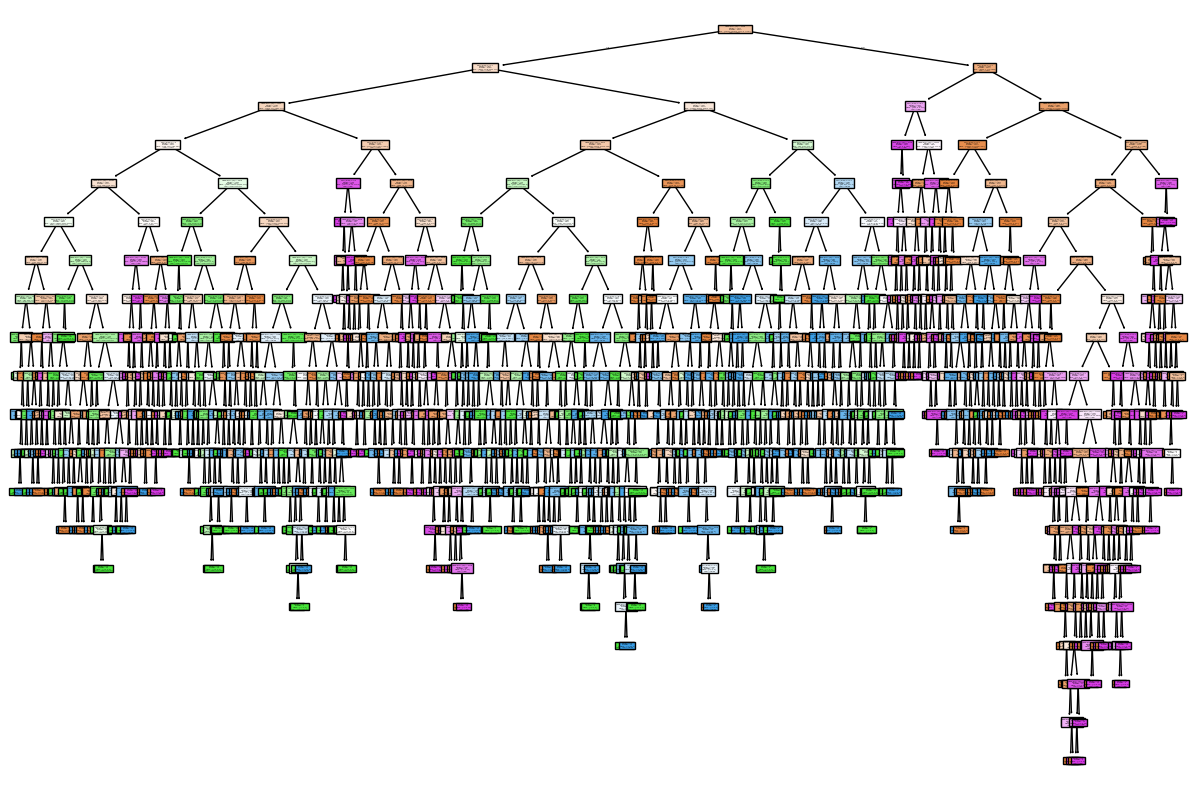

In [9]:
# Visualisasi pohon
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.show()